# Merge Sort

# Algorithm

In [1]:
def merge_sort(arr) :
    steps = 0

    def merge(left, right):
        nonlocal steps
        merged = []
        i = 0
        j = 0
        
        while (i < len(left) and j < len(right)):
            if left[i] < right[j]:
                merged.append(left[i])
                i += 1
            else:
                merged.append(right[j])
                j += 1
            steps += 3
        
        while i < len(left):
            merged.append(left[i])
            i += 1
            steps += 2
        
        while j < len(right):
            merged.append(right[j])
            j += 1
            steps += 2
        
        return merged

    def merge_sort_inner(arr):
        nonlocal steps
        length = len(arr)
        if length <= 1:
            return arr
        
        mid = length // 2
        left = arr[:mid]
        right = arr[mid:]
        steps += 1 + length # slicing takes n operations

        left_sorted = merge_sort_inner(left)
        right_sorted = merge_sort_inner(right)
        steps += 2

        return merge(left_sorted, right_sorted)

    sorted_arr = merge_sort_inner(arr)
    return sorted_arr, steps
  
    

In [2]:
B = [5, 2, 4, 6, 1, 3]
B, steps = merge_sort(B)
print(B, steps)

[1, 2, 3, 4, 5, 6] 74


13 / 13


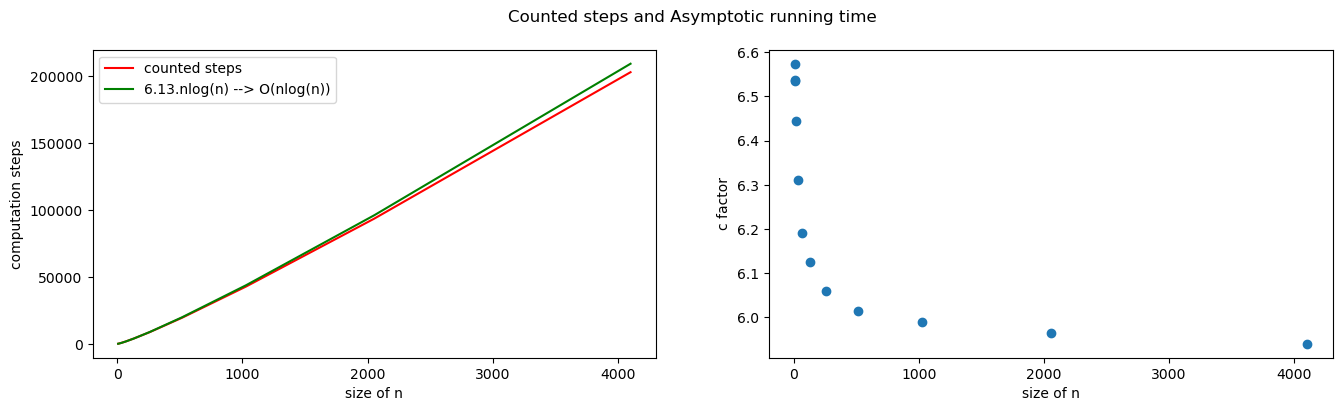

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
import sys
from math import log
from IPython.display import clear_output

mpl.rcParams['figure.figsize'] = [16,4]
sys.setrecursionlimit(10000)

fig, ax = plt.subplots(1, 2)
fig.suptitle('Counted steps and Asymptotic running time')

points = 13 # plotting points
x = []
y = []
ref = []
c = []

for i in range(1, points):
    clear_output(wait = True)
    print(i + 1, "/", points)

    # Generate a new random array of size 5 + 2**i
    B = [random.randint(1, 10) for _ in range(5 + 2**i)]

    B, steps = merge_sort(B) 
    x.append(len(B))
    y.append(steps)    
    c.append(steps / (len(B) * log(len(B))))  # estimation of c for T(sort) = c.N.log(N)
    
    
    
for v in x:
    ref.append([v * log(v) * c[6]])
ax[0].plot(x, y, color="red", label="counted steps")
ax[0].plot(x, ref, color="green", label = str(round(c[6], 2)) + ".nlog(n) --> O(nlog(n))")
ax[0].set_xlabel("size of n")
ax[0].set_ylabel("computation steps")
ax[0].legend()

ax[1].scatter(x ,c, label = "approximation of c" )
ax[1].set_xlabel("size of n")
ax[1].set_ylabel("c factor")

plt.show()    